In [7]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from matplotlib import pyplot

from sklearn.tree import export_graphviz
from six import StringIO
#from sklearn.externals.six import StringIO #doesn't exist in scicit learn 0.23
from IPython.display import Image  
import pydotplus

# Pre-Processing

In [8]:
# Upload information file converted_data_eng.csv
url='https://drive.google.com/file/d/10w2XYLa738ExI2D7z1laWRjQa7M9g6pT/view?usp=sharing'
path='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(path)

In [9]:
data['failure_mode'].unique()

array(['Unplanned_Maintenance', 'Normalfall', 'Blocked_Lego',
       'Waiting_Time', 'Fallen_Lego', 'Machine_Downtime_Long',
       'Machine_Downtime_Short', 'Reduced_Motorspeed'], dtype=object)

In [10]:
# Categorize failue modes to numeric values from blocked Lego: 1 to Waiting_time :8
classes = {'Blocked_Lego': 1, 'Fallen_Lego': 2, 'Machine_Downtime_Long': 3, 'Machine_Downtime_Short': 4, 'Normalfall': 5, 'Reduced_Motorspeed': 6, 'Unplanned_Maintenance': 7, 'Waiting_Time': 8}
data['failure_class'] = data['failure_mode'].map(classes)
data = data.drop(['failure_mode'], axis = 1)

In [11]:
## display the first rows of the dataset
data.head()

cycle_time duration_cam duration_end      wait  fork_light_barrier  \
0   00:00:02     00:00:02     00:00:00  00:05:39                   1   
1   00:00:02     00:00:02     00:00:00  00:07:05                   1   
2   00:00:02     00:00:01     00:00:01  00:00:03                   1   
3   00:00:07     00:00:07     00:00:00  00:00:03                   1   
4   00:00:02     00:00:01     00:00:01  00:00:03                   1   

   acc_sensor  motor_temp  Lego_check  width_Lego  length_Lego  \
0      2.6416     28.5206           1      164.23       246.44   
1      2.6519     26.7138           1      163.77       246.32   
2      2.6487     24.1249           1      163.53       246.42   
3      2.6484     28.7740           1      163.35       246.28   
4      2.6513     27.0664           1      163.36       246.68   

   horizontal_distance  vertical_distance  failure_class  
0            -0.032533          -0.389930              7  
1            -0.033498          -0.367090              7  
2            -0.038323          -0.366120              5  
3             0.025371          -0.016770              1  
4             0.021510          -0.024169              5

In [12]:
##You need this for data preprocessing -- we want to calculate not with time format than with durations as numbers
Zyklus_neu = [] # new_cycle = []
Dauer_Kamera_neu = []  # new_camera_duration = []
Dauer_Ende_neu = [] # new_final_duration = []
Wartezeit_neu = [] #new_waiting_time = []

for x in data['cycle_time']:
    (h, m, s) = x.split(':')
    x = int(h) * 3600 + int(m) * 60 + int(s)
    Zyklus_neu.append(x)
    
data['cycle_time'] = Zyklus_neu

for x in data['duration_cam']:
    (h, m, s) = x.split(':')
    x = int(h) * 3600 + int(m) * 60 + int(s)
    Dauer_Kamera_neu.append(x)
    
data['duration_cam'] = Dauer_Kamera_neu

for x in data['duration_end']:
    (h, m, s) = x.split(':')
    x = int(h) * 3600 + int(m) * 60 + int(s)
    Dauer_Ende_neu.append(x)
    
data['duration_end'] = Dauer_Ende_neu

for x in data['wait']:
    (h, m, s) = x.split(':')
    x = int(h) * 3600 + int(m) * 60 + int(s)
    Wartezeit_neu.append(x)
    
data['wait'] = Wartezeit_neu


In [13]:
## display the first rows of the NEW dataset
data.head()

cycle_time  duration_cam  duration_end  wait  fork_light_barrier  \
0           2             2             0   339                   1   
1           2             2             0   425                   1   
2           2             1             1     3                   1   
3           7             7             0     3                   1   
4           2             1             1     3                   1   

   acc_sensor  motor_temp  Lego_check  width_Lego  length_Lego  \
0      2.6416     28.5206           1      164.23       246.44   
1      2.6519     26.7138           1      163.77       246.32   
2      2.6487     24.1249           1      163.53       246.42   
3      2.6484     28.7740           1      163.35       246.28   
4      2.6513     27.0664           1      163.36       246.68   

   horizontal_distance  vertical_distance  failure_class  
0            -0.032533          -0.389930              7  
1            -0.033498          -0.367090              7  
2            -0.038323          -0.366120              5  
3             0.025371          -0.016770              1  
4             0.021510          -0.024169              5

# Spliting and training of data

In [14]:
#split dataset in features and target variable
feature_cols = ['cycle_time', 'duration_cam', 'duration_end', 'wait', 'fork_light_barrier', 'acc_sensor', 'motor_temp', 'Lego_check', 'width_Lego', 'length_Lego', 'horizontal_distance', 'vertical_distance']
X = data[feature_cols] # Features (independent variables)
y = data.failure_class # Target variable


In [15]:
# Split dataset into training set and test set
# 70% training and 30% test, use also random_state=42, shuffle=False as parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False) 

In [16]:
# Create Decision Tree classifer object
dt_Classifier = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_Classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_Classifier.predict(X_test)

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2))

Accuracy: 97.51


In [18]:
##Here we want to save the predicted and the real failure classes
counter = list(range(0, 2328))
pred_df = pd.DataFrame(data=y_pred, index=counter, columns=['Fehlerklasse']) #FailureClass

In [19]:
pred_df.to_csv('pred_failure_class.csv')

In [20]:
y_test.to_csv('real_failure_class.csv')

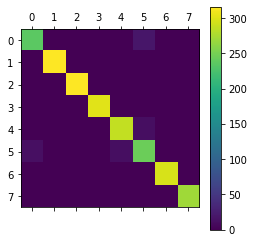

array([[236,   0,   0,   0,   1,  19,   0,   0],
       [  0, 316,   0,   0,   0,   0,   0,   0],
       [  0,   0, 316,   0,   0,   0,   0,   0],
       [  0,   0,   0, 302,   0,   0,   0,   0],
       [  1,   0,   0,   0, 287,  12,   0,   0],
       [ 13,   0,   0,   0,  12, 245,   0,   0],
       [  0,   0,   0,   0,   0,   0, 297,   0],
       [  0,   0,   0,   0,   0,   0,   0, 271]])

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Plot the confusion matrix
cm = confusion_matrix(y_test,pred_df)
plt.matshow(cm)
plt.colorbar()
plt.show()

cm

# Different kinds of depths and coefficients


In [22]:
!pip install pydotplus
import pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

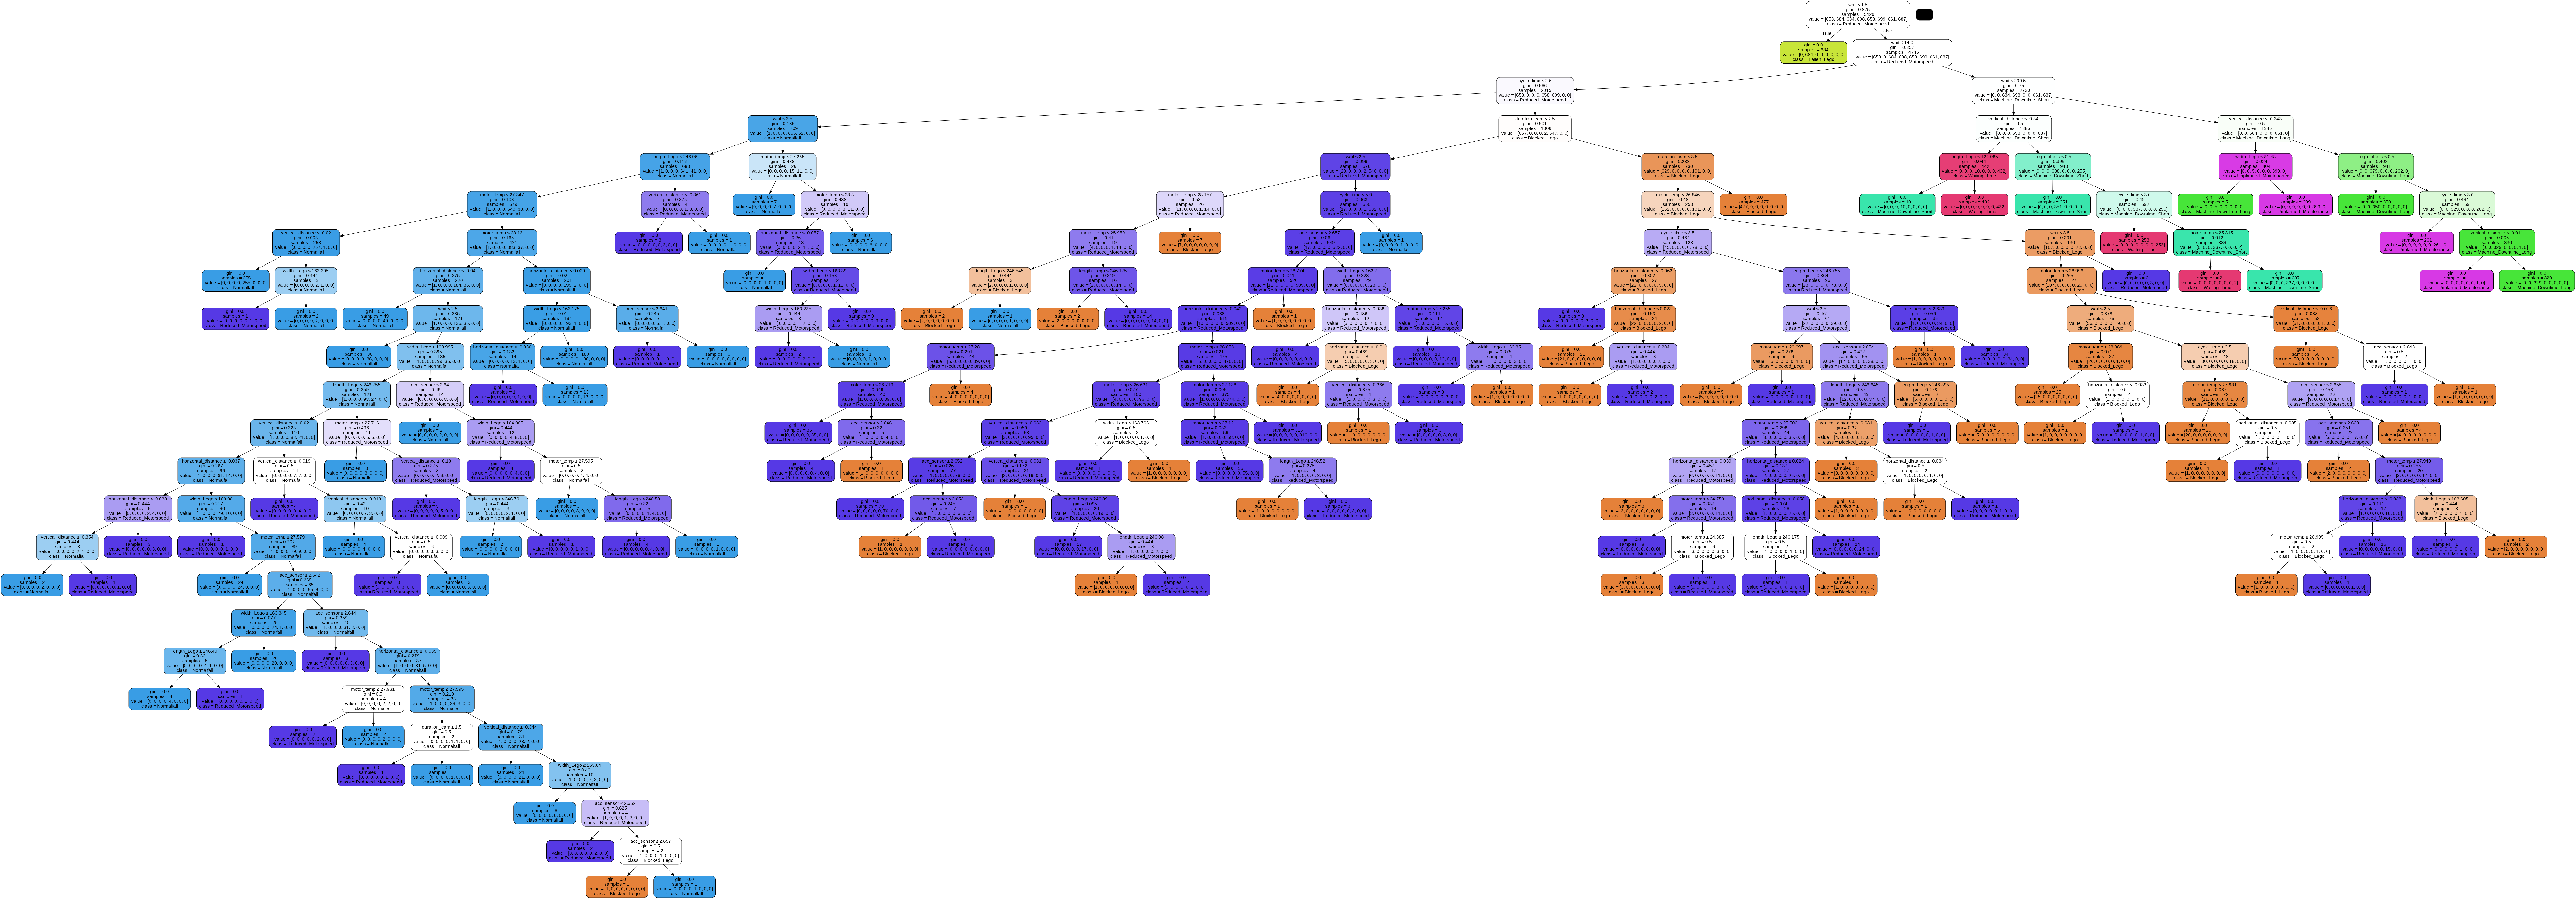

In [24]:
##Here the full depth Decision Tree classifer is displayed and stored 
from six import StringIO
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_Classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Blocked_Lego', 'Fallen_Lego', 'Machine_Downtime_Long', 'Machine_Downtime_Short', 'Normalfall', 'Reduced_Motorspeed', 'Unplanned_Maintenance', 'Waiting_Time'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('error.png')
Image(graph.create_png())

In [25]:
# Create Decision Tree classifer object with gini criterion and max_depth of 6
dt_Classifier_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=6)

# Train Decision Tree Classifer
dt_Classifier_gini.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gini = dt_Classifier_gini.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9750859106529209


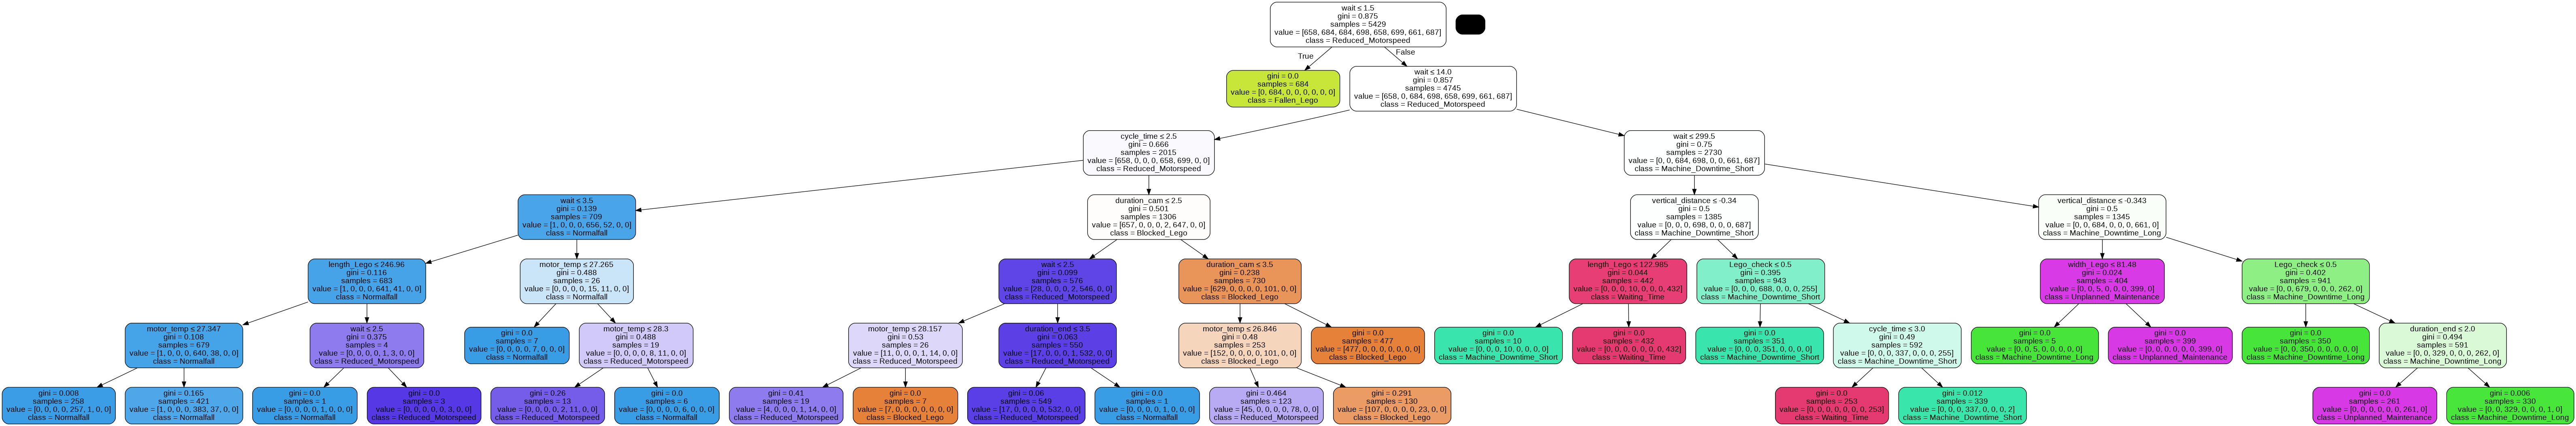

In [26]:
##Here max_depth = 6 Decision Tree classifer is displayed and stored 
from six import StringIO
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_Classifier_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Blocked_Lego', 'Fallen_Lego', 'Machine_Downtime_Long', 'Machine_Downtime_Short', 'Normalfall', 'Reduced_Motorspeed', 'Unplanned_Maintenance', 'Waiting_Time'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('error_2.png')
Image(graph.create_png())

Feature: 0, Score: 0.19321
Feature: 1, Score: 0.10511
Feature: 2, Score: 0.06433
Feature: 3, Score: 0.45415
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00971
Feature: 7, Score: 0.03709
Feature: 8, Score: 0.00218
Feature: 9, Score: 0.00515
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.12907


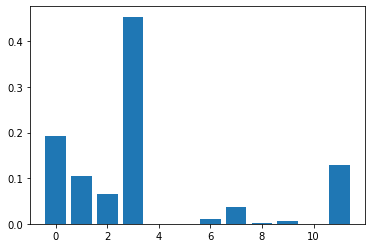

In [27]:
## Find out the importance of the DT features using the "clf.feature_importances_" method
## Feature importances are provided by the fitted attribute feature_importances_ and they 
## are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.
importance = dt_Classifier_gini.feature_importances_

# Summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [28]:
# Importance is relevant to 'X_test'

In [33]:
# Use df.columns command to drop columns via indexing
df.drop(df.columns[[2, 4, 5, 10]], axis=1)

NameError: ignored

In [30]:
X_train.columns

Index(['cycle_time', 'duration_cam', 'duration_end', 'wait',
       'fork_light_barrier', 'acc_sensor', 'motor_temp', 'Lego_check',
       'width_Lego', 'length_Lego', 'horizontal_distance',
       'vertical_distance'],
      dtype='object')

# Drop Features

In [31]:
##Now, drop the 5 less important features
data = data.drop(['fork_light_barrier', 'acc_sensor', 'width_Lego', 'horizontal_distance', 'length_Lego'], axis = 1)

In [32]:
## display the first rows of the reduced dataset
data.head()

cycle_time  duration_cam  duration_end  wait  motor_temp  Lego_check  \
0           2             2             0   339     28.5206           1   
1           2             2             0   425     26.7138           1   
2           2             1             1     3     24.1249           1   
3           7             7             0     3     28.7740           1   
4           2             1             1     3     27.0664           1   

   vertical_distance  failure_class  
0          -0.389930              7  
1          -0.367090              7  
2          -0.366120              5  
3          -0.016770              1  
4          -0.024169              5

In [34]:
#split dataset in features and target variable
feature_cols = ['cycle_time', 'duration_cam', 'duration_end', 'wait', 'motor_temp', 'Lego_check', 'vertical_distance']
X = data[feature_cols] # Features (independent variables)
y = data.failure_class # Target variable

In [35]:
# Split dataset into training set and test set
# 70% training and 30% test - look at cell [17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False) # Take away random_state, so its default


In [ ]:
# Create Decision Tree classifer object
df_Classifier_trimmed = DecisionTreeClassifier()

# Train Decision Tree Classifer
df_Classifier_trimmed.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_trimmed = df_Classifier_trimmed.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_trimmed)*100,2))

In [ ]:
# Create Decision Tree classifer object with gini criterion and max_depth of 7
dt_Classifier_gini_mx7= DecisionTreeClassifier(criterion = 'gini', max_depth=7)
# Train Decision Tree Classifer
dt_Classifier_gini_mx7.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gini_mx7= dt_Classifier_gini_mx7.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_gini_mx7)*100,2))

In [ ]:
##Here max_depth = 7 Decision Tree classifer is displayed and stored 

from six import StringIO
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_Classifier_gini_mx7, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Blocked_Lego', 'Fallen_Lego', 'Machine_Downtime_Long', 'Machine_Downtime_Short', 'Normalfall', 'Reduced_Motorspeed', 'Unplanned_Maintenance', 'Waiting_Time'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('error_dropped.png')
Image(graph.create_png())

# ADDITIONAL TASK: Application and comparison of different algorithms

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

In [ ]:
## Use Stochastic Gradient Decent max_iter=5, tol=None
SDG_Classifier = SGDClassifier(max_iter=5,tol=None)
# Create SGD 


# Train Decision Tree Classifer


# Predict the response for test dataset


# Metrics

##Stochastic_Gradient_Decent = round(metrics.accuracy_score(y_test, y_pred_sgd)*100, 2)
##print('Stochastic Gradient Decent = ', Stochastic_Gradient_Decent)

In [ ]:
# Create RF with n_estimators=100


# Train RF


# Predict the response for test dataset with RF


# Metrics

##Random_Forest = round(metrics.accuracy_score(y_test, y_pred_rf)*100, 2)
##print('Random Forest = ', Random_Forest)

In [ ]:
# Create Logistic Regression 


# Train LR


# Predict the response for test dataset with LR


# Metrics

##Logistic_Regression = round(metrics.accuracy_score(y_test, y_pred_lr)*100, 2)
##print('Logistic Regression = ', Logistic_Regression)

In [ ]:
# Create KNN 


# Train KNN


# Predict the response for test dataset with KNN


# Metrics  

##KNN = round(metrics.accuracy_score(y_test, y_pred_knn)*100, 2)
##print('KNN = ', KNN)

In [ ]:
# Create Perceptron 


# Train Perceptron


# Predict the response for test dataset with Perceptron


# Metrics 

##Perceptron = round(metrics.accuracy_score(y_test, y_pred_per)*100, 2)
##print('Perceptron = ', Perceptron)

In [ ]:
##Here we summarize the results

##results = pd.DataFrame({
##    'Model': ['KNN', 'Logistic Regression', 
##              'Random Forest', 'Perceptron', 
##              'Stochastic Gradient Decent', 
##              'Decision Tree'],
##    'Score': [KNN, Logistic_Regression, 
##              Random_Forest, Perceptron, 
##              Stochastic_Gradient_Decent, Decision_Tree]})
##result_df = results.sort_values(by='Score', ascending=False)
##result_df = result_df.set_index('Score')
##result_df.head(6)